# 사전 작업
## Conda 환경 생성 및 패키지 설치
터미널에서 새로운 conda 환경 생성(anaconda prompt에서)

In [ ]:
conda create -n paddle_env python=3.9 -y
conda activate paddle_env

## 필요한 라이브러리 설치
Conda 환경에서 필요한 모든 라이브러리를 설치

In [ ]:
# PaddlePaddle 및 관련 패키지 설치
conda install -c conda-forge paddlepaddle-gpu
conda install -c conda-forge paddlepaddle
pip install paddleocr

# LabelImg 설치
pip install labelImg

# Scikit-learn 및 기타 필요한 패키지 설치
conda install -c conda-forge scikit-learn
conda install -c conda-forge scikit-image
conda install -c conda-forge threadpoolctl

# 폰트 설치 (필요하면 하셈)
conda install -c conda-forge font-ttf-nanum

# 라이브러리 설치

In [1]:
%pip install paddleocr
%pip install paddlepaddle-gpu
!apt-get update -qq
!apt-get install -qq fonts-nanum
!fc-list | grep "NanumGothic"

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'fc-list'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


# VScode에서 실행할 스크립트

## 전체 코드

In [11]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
from matplotlib import pyplot as plt

[2024/06/27 17:34:40] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\user/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\user/.paddleocr/whl\\rec\\korean\\korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num

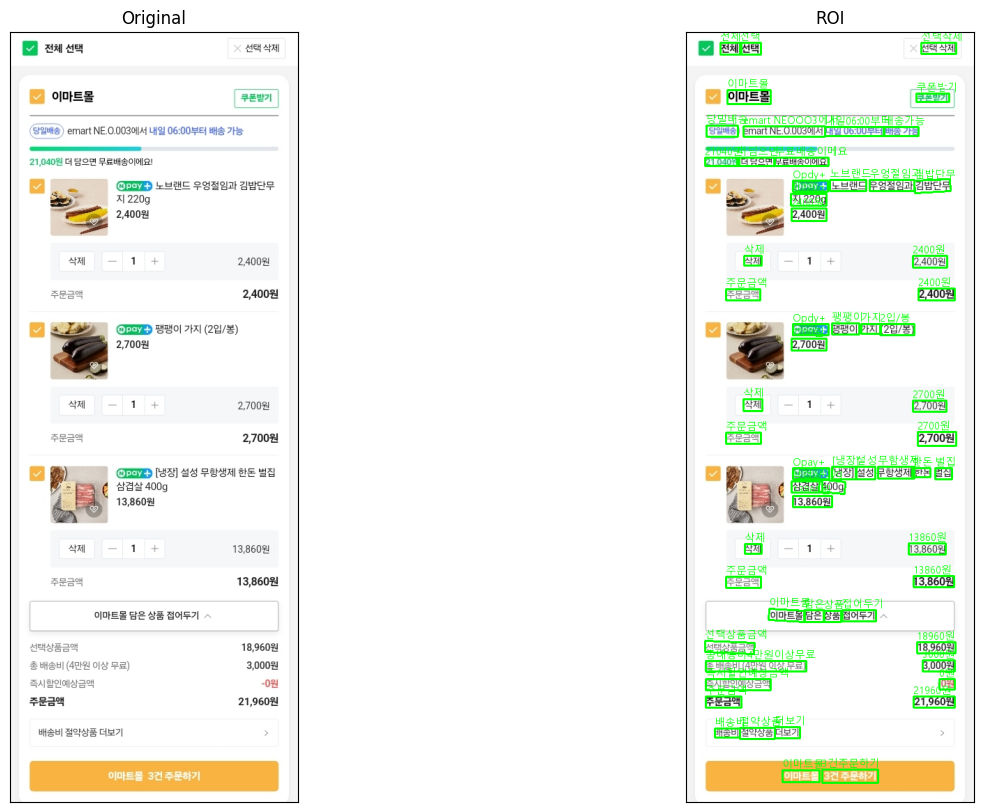

[['쿠폰받기', '당밀배송', 'emart NEOOO3에서', '내일06:00부터', '배송가능', '21040원', '더딤으면', '무료배송이메요', 'Opdy+', '노브랜드', '우엉절임과', '김밥단무', '지220g', '2400원', '삭제', '2400원']]


In [24]:
def extract_text_between_keywords(text_list, start_keyword, end_keyword, stop_keyword):
    result = []
    temp = []
    capture = False

    for text in text_list:
        if start_keyword in text:
            capture = True
            temp = []
        elif stop_keyword in text:
            break
        elif end_keyword in text and capture:
            capture = False
            if temp:
                result.append(temp)
            temp = []
        if capture:
            temp.append(text)

    return result

def plt_imshow(title='image', img=None, figsize=(8, 5)):
    plt.figure(figsize=figsize)

    if type(img) is str:
        img = cv2.imread(img)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

def put_text(image, text, x, y, color=(0, 255, 0), font_size=22):
    if type(image) == np.ndarray:
        color_converted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(color_converted)

    font_path = 'C:/Windows/Fonts/malgun.ttf'

    try:
        image_font = ImageFont.truetype(font_path, font_size)
    except IOError:
        image_font = ImageFont.load_default()

    draw = ImageDraw.Draw(image)

    try:
        draw.text((x, y), text, font=image_font, fill=color)
    except UnicodeEncodeError:
        fallback_font = ImageFont.load_default()
        draw.text((x, y), text, font=fallback_font, fill=color)

    numpy_image = np.array(image)
    opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)

    return opencv_image

class MyPaddleOCR:
    def __init__(self, lang: str = "korean", **kwargs):
        self.lang = lang
        self._ocr = PaddleOCR(lang="korean", use_gpu=False, use_angle_cls=True, use_space_char=True)
        self.img_path = None
        self.ocr_result = {}

    def get_available_langs(self):
        langs_info = []

        for idx, model_name in enumerate(list(MODEL_URLS['OCR'].keys())):
            for lang in list(MODEL_URLS['OCR'][model_name]['rec'].keys()):
                if lang not in langs_info:
                    langs_info.append(lang)

        print('Available Language : {}'.format(langs_info))

    def get_available_models(self):
        model_info = {}

        for idx, model_name in enumerate(list(MODEL_URLS['OCR'].keys())):
            model_info[model_name] = list(MODEL_URLS['OCR'][model_name]['rec'].keys())
            print('#{} Model Vesion : [{}] - Language : {}'.format(idx+1, model_name, list(MODEL_URLS['OCR'][model_name]['rec'].keys())))

    def get_ocr_result(self):
        return self.ocr_result

    def get_img_path(self):
        return self.img_path

    def show_img(self):
        plt_imshow(img=self.img_path)

    def run_ocr(self, img_path: str, debug: bool = False, raw=False):
        self.img_path = img_path
        ocr_text = []
        result = self._ocr.ocr(img_path, cls=False)
        self.ocr_result = result[0]

        if self.ocr_result:
            for r in result[0]:
                ocr_text.append(r[1][0])
        else:
            ocr_text = "No text detected."

        if debug:
            self.show_img_with_ocr()
        if raw:
            return ocr_text
        else:
            return extract_text_between_keywords(ocr_text, '쿠폰받기', '주문금액', '접어두기')

    def show_img_with_ocr(self):
        img = cv2.imread(self.img_path)
        roi_img = img.copy()

        for text_result in self.ocr_result:
            text = text_result[1][0]
            tlX = int(text_result[0][0][0])
            tlY = int(text_result[0][0][1])
            trX = int(text_result[0][1][0])
            trY = int(text_result[0][1][1])
            brX = int(text_result[0][2][0])
            brY = int(text_result[0][2][1])
            blX = int(text_result[0][3][0])
            blY = int(text_result[0][3][1])

            topLeft = (tlX, tlY)
            topRight = (trX, trY)
            bottomRight = (brX, brY)
            bottomLeft = (blX, blY)

            cv2.line(roi_img, topLeft, topRight, (0, 255, 0), 2)
            cv2.line(roi_img, topRight, bottomRight, (0, 255, 0), 2)
            cv2.line(roi_img, bottomRight, bottomLeft, (0, 255, 0), 2)
            cv2.line(roi_img, bottomLeft, topLeft, (0, 255, 0), 2)
            roi_img = put_text(roi_img, text, topLeft[0], topLeft[1] - 20, font_size=15)

        plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))


# Example usage:
ocr = MyPaddleOCR()
ocr_output = ocr.run_ocr('C:/Users/user/Desktop/coupang/images/naver5.jpg', debug=True, raw=True)
print(ocr_output)


In [63]:
import re

def split_string(s):
    # 정규 표현식을 사용하여 문자와 숫자+단위 부분을 분리
    match = re.match(r"([^\d]+)(\d+.*)", s)
    if match:
        return match.groups()
    return s, ''

# 원하는 데이터를 추출하는 함수
def extract_items(data):
    result = []
    current_item = []
    capture = False

    for item in data:
        if item.startswith("Opdy+") or item.startswith("Opay+") or item.startswith("Cpay+") or item.startswith("Dpoy+"):
            capture = True
            if current_item:
                
                result.append(' '.join(current_item))
                current_item = []
        elif capture:
            if re.match(r'\d+원', item) or re.match(r'\d+', item):
                if 'g' in current_item[-1]:
                    prev = current_item[-2]
                    curr = current_item.pop(-1)
                    res = split_string(curr)
                    current_item[-1] = prev + res[0]
                 
                capture = False
                result.append(' '.join(current_item))
                current_item = []
            else:
                current_item.append(item)

    if current_item: 
        result.append(' '.join(current_item))
    
    return result


[2024/06/27 18:02:07] ppocr DEBUG: dt_boxes num : 55, elapsed : 0.05128002166748047
[2024/06/27 18:02:10] ppocr DEBUG: rec_res num  : 55, elapsed : 2.777763843536377


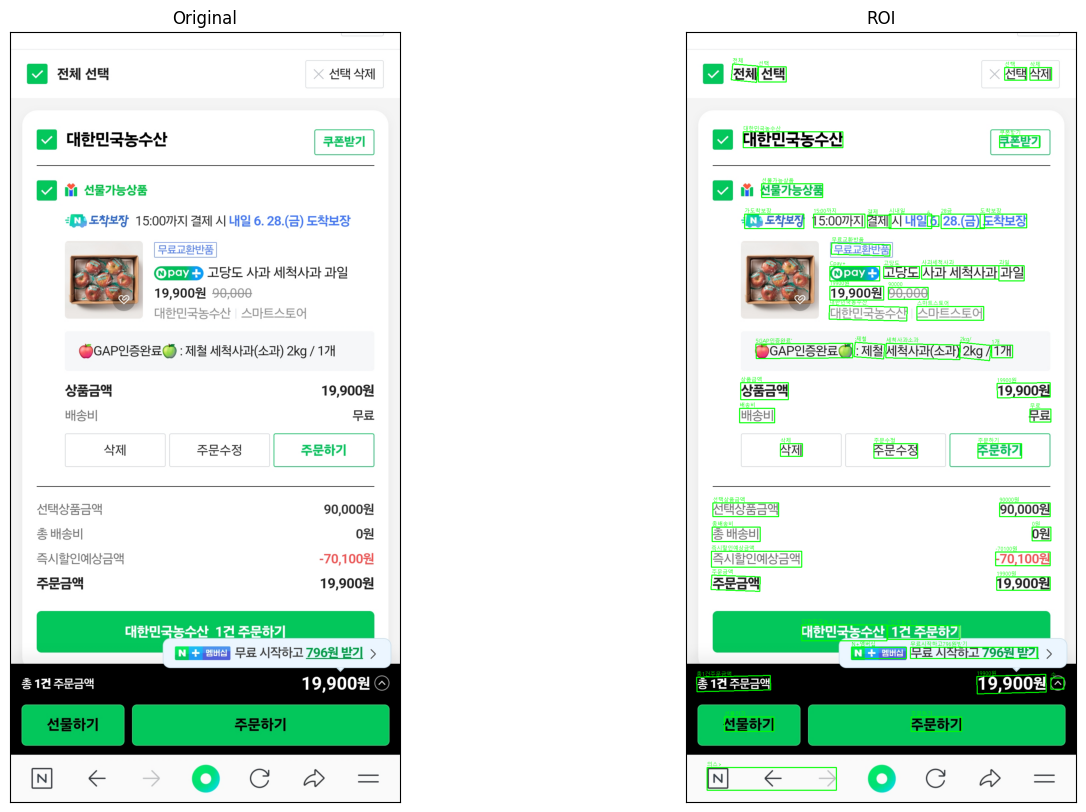

['전체',
 '선택',
 '선택',
 '삭제',
 '대한민국농수산',
 '쿠폰받기',
 '선물가능상품',
 '가도착보장',
 '15:00까지',
 '결제',
 '시내일',
 '6',
 '28금',
 '도착보장',
 '무료교환반품',
 'Cpay+',
 '고당도',
 '사과세척사과',
 '과일',
 '19900원',
 '90000',
 '대한민국농수산',
 '스마트스토어',
 "5GAP인증완료'",
 ':제철',
 '세척사과소과',
 '2kg/',
 '1개',
 '상품금액',
 '19900원',
 '배송비',
 '무료',
 '삭제',
 '주문수정',
 '주문하기',
 '선택상품금액',
 '90000원',
 '총배송비',
 '0원',
 '즉시할인예상금액',
 '-70100원',
 '주문금액',
 '19900원',
 '대한민국농수산',
 '1건주문하기',
 'N+멤버십',
 '무료시작하고796원받기',
 '총1건주문금액',
 '19900원',
 '수',
 '선물하기',
 '주문하기',
 '의스>']

In [56]:
res_2 = ocr.run_ocr('C:/Users/user/Desktop/coupang/images/naver2.jpg', debug=True, raw=True)
res_2

In [60]:
items2 = extract_items(res_2)
items2

['고당도 사과세척사과 과일']

[2024/06/27 18:06:23] ppocr DEBUG: dt_boxes num : 52, elapsed : 0.07121658325195312
[2024/06/27 18:06:25] ppocr DEBUG: rec_res num  : 52, elapsed : 2.506870746612549


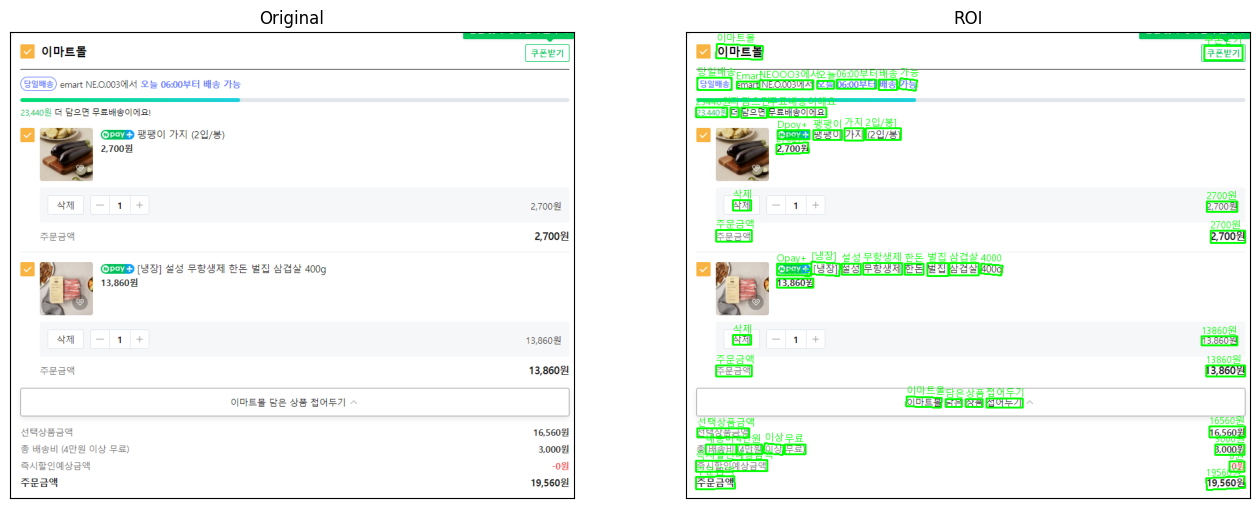

['이마트몰',
 '쿠폰받기',
 '당일배송',
 'Emart',
 'NEOOO3에서',
 '오늘',
 '06:00부터',
 '배송',
 '가능',
 '23440원',
 '더',
 '담으면',
 '무료배송이에요',
 'Dpoy+',
 '팽팽이',
 '가지',
 '2입/봉]',
 '2700원',
 '삭제',
 '2700원',
 '주문금액',
 '2700원',
 'Opay+',
 '[냉장]',
 '설성',
 '무항생제',
 '한돈',
 '벌집',
 '삼겹살',
 '4000',
 '13860문',
 '삭제',
 '13860원',
 '주문금액',
 '13860원',
 '이마트몰',
 '담은',
 '상품',
 '접어두기',
 '선택상품금액',
 '16560원',
 '배송비',
 '4만원',
 '이상',
 '무료',
 '3000원',
 '즉시할인예상금액',
 '0원',
 '주문금액',
 '19560원']

In [64]:
res_3 = ocr.run_ocr('C:/Users/user/Desktop/coupang/images/naver3.jpg', debug=True, raw=True)
res_3

In [65]:
items3 = extract_items(res_3)
items3

['팽팽이 가지', '[냉장] 설성 무항생제 한돈 벌집 삼겹살']

[2024/06/27 18:06:58] ppocr DEBUG: dt_boxes num : 52, elapsed : 0.06949353218078613
[2024/06/27 18:07:00] ppocr DEBUG: rec_res num  : 52, elapsed : 2.7862672805786133


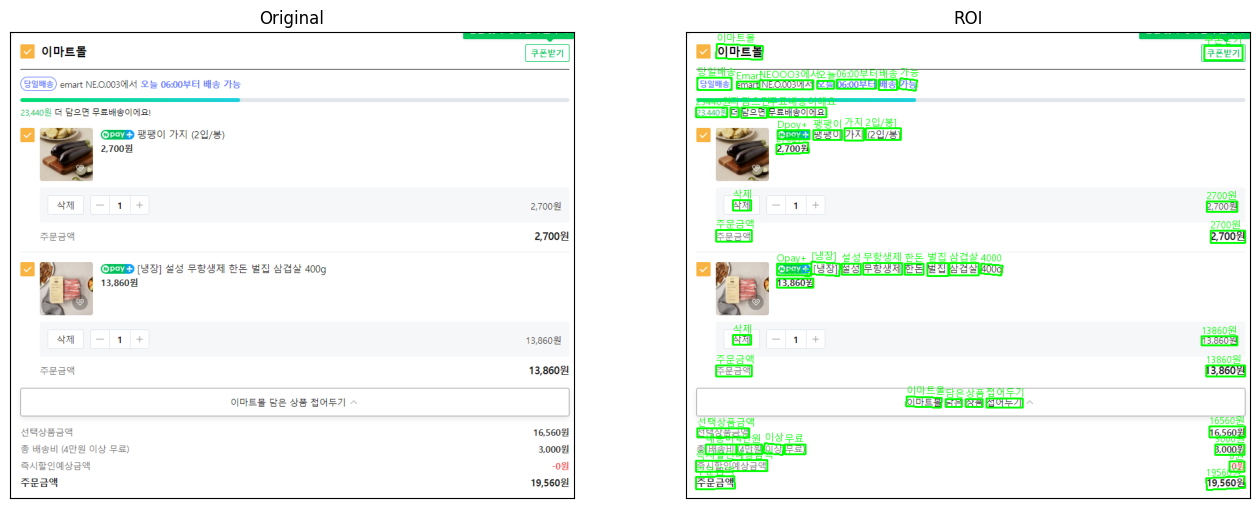

['이마트몰',
 '쿠폰받기',
 '당일배송',
 'Emart',
 'NEOOO3에서',
 '오늘',
 '06:00부터',
 '배송',
 '가능',
 '23440원',
 '더',
 '담으면',
 '무료배송이에요',
 'Dpoy+',
 '팽팽이',
 '가지',
 '2입/봉]',
 '2700원',
 '삭제',
 '2700원',
 '주문금액',
 '2700원',
 'Opay+',
 '[냉장]',
 '설성',
 '무항생제',
 '한돈',
 '벌집',
 '삼겹살',
 '4000',
 '13860문',
 '삭제',
 '13860원',
 '주문금액',
 '13860원',
 '이마트몰',
 '담은',
 '상품',
 '접어두기',
 '선택상품금액',
 '16560원',
 '배송비',
 '4만원',
 '이상',
 '무료',
 '3000원',
 '즉시할인예상금액',
 '0원',
 '주문금액',
 '19560원']

In [66]:
res_4 = ocr.run_ocr('C:/Users/user/Desktop/coupang/images/naver3.jpg', debug=True, raw=True)
res_4

In [67]:
items4 = extract_items(res_4)
items4


['팽팽이 가지', '[냉장] 설성 무항생제 한돈 벌집 삼겹살']

[2024/06/27 18:07:21] ppocr DEBUG: dt_boxes num : 62, elapsed : 0.1856086254119873
[2024/06/27 18:07:25] ppocr DEBUG: rec_res num  : 62, elapsed : 3.228802442550659


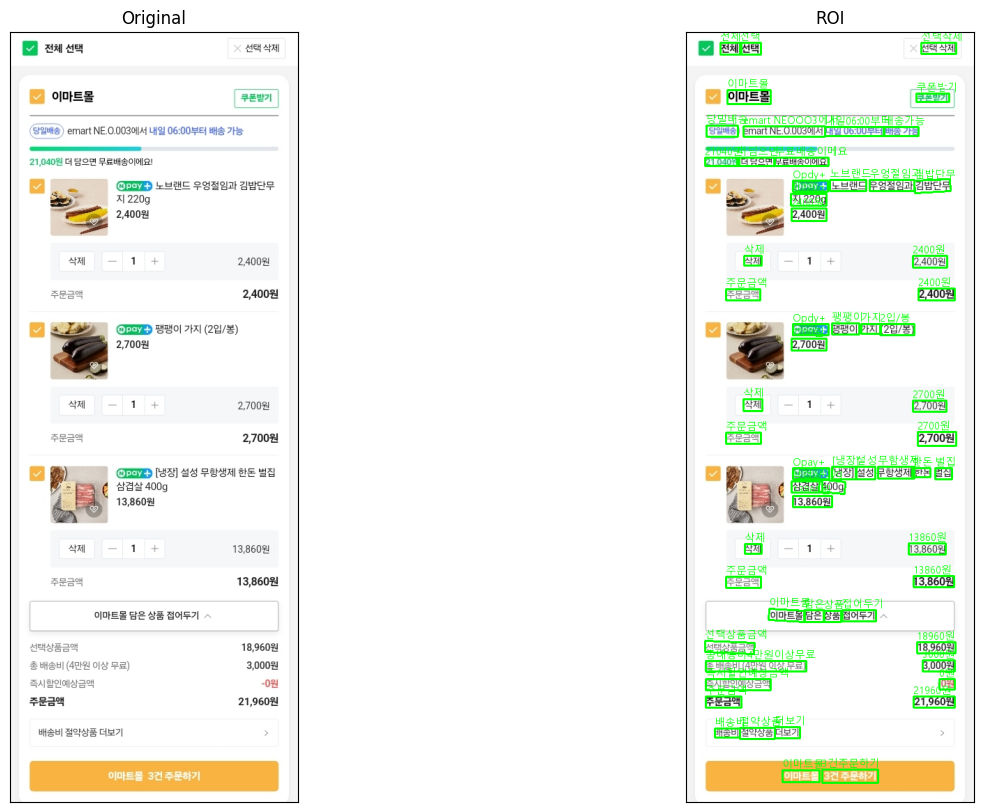

['전체',
 '선택',
 '선택삭제',
 '이마트몰',
 '쿠폰받기',
 '당밀배송',
 'emart NEOOO3에서',
 '내일06:00부터',
 '배송가능',
 '21040원',
 '더딤으면',
 '무료배송이메요',
 'Opdy+',
 '노브랜드',
 '우엉절임과',
 '김밥단무',
 '지220g',
 '2400원',
 '삭제',
 '2400원',
 '주문금액',
 '2400원',
 'Opdy+',
 '팽팽이',
 '가지',
 '2입/봉',
 '2700원',
 '삭제',
 '2700원',
 '주문금액',
 '2700원',
 'Opay+',
 '[냉장]',
 '설성',
 '무함생제',
 '한돈',
 '벌집',
 '삼겹살',
 '400g',
 '13860원',
 '삭제',
 '13860원',
 '주문금액',
 '13860원',
 '이마트몰',
 '담은',
 '상품',
 '접어두기',
 '선택상품금액',
 '18960원',
 '총배송비4만원이상무료',
 '3000원',
 '즉시할인예상금액',
 '0원',
 '주문금액',
 '21960원',
 '배송비',
 '절약상품',
 '더보기',
 '이마트몰',
 '3건주문하기']

In [68]:
res_5 = ocr.run_ocr('C:/Users/user/Desktop/coupang/images/naver5.jpg', debug=True, raw=True)
res_5

In [69]:
items5 = extract_items(res_5)
items5

['노브랜드 우엉절임과 김밥단무지', '팽팽이 가지', '[냉장] 설성 무함생제 한돈 벌집 삼겹살']